## What is SMOTE?
##### SMOTE stands for Synthetic Minority Oversampling Technique. It is a method used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE generates synthetic instances of the minority class by interpolating between existing minority class instances.

In [1]:
from sklearn.datasets import make_classification

In [6]:
X,y = make_classification(n_samples=1000,n_redundant=0, n_features=2,n_clusters_per_class=1,
    weights=[0.90],random_state = 12)

In [10]:
import pandas as pd
df1 = pd.DataFrame(X,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])

final_df = pd.concat([df1,df2],axis=1)
final_df.head()


,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [11]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

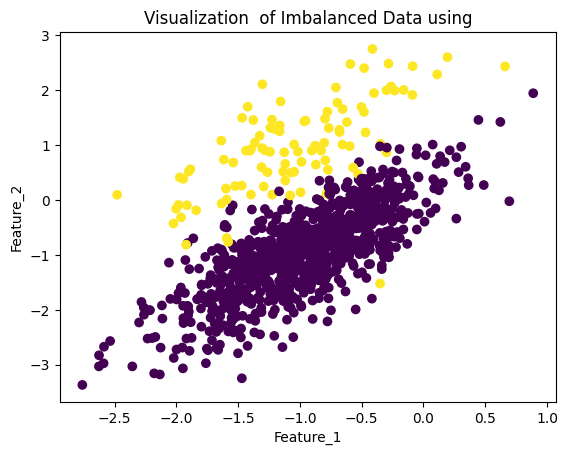

In [29]:
# now Visualizing  through matplotlib
import matplotlib.pyplot as plt 

plt.scatter(final_df['f1'],final_df['f2'], c=final_df['target'])
plt.title('Visualization  of Imbalanced Data using')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.show()

In [14]:
# Now apply to balance the imbalance Data using SMOTE
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [imblearn]


In [15]:
from imblearn.over_sampling import SMOTE

In [23]:
# Initialize SMOTE oversampler
oversample = SMOTE()
# Apply SMOTE to the dataset
X_resampled,y_resampled = oversample.fit_resample(final_df[['f1','f2']],final_df['target'])


In [24]:
X_resampled.shape
# the below 1800 is because of SMOTE and in SMOTE the number of minority class samples increases to match 
# the majority class, resulting in a balanced dataset with 1800 samples.

(1800, 2)

In [25]:
print(X_resampled.shape)
print(y_resampled.shape)

(1800, 2)
(1800,)


In [ ]:
# Verifying the Balanced Class Distribution
import numpy as np 

print(np.sum(y_resampled == 0))
print(np.sum(y_resampled == 1))

900
900


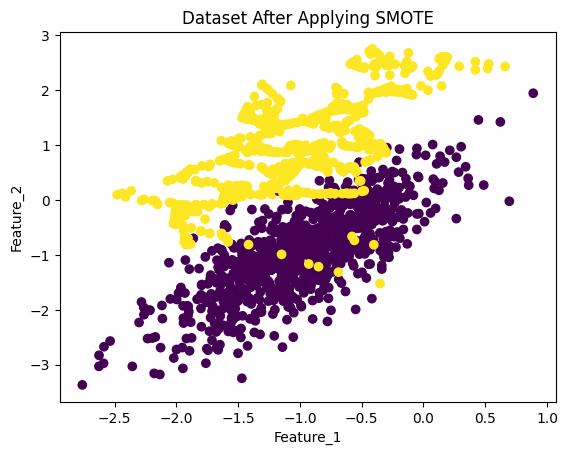

In [32]:
# Now Visualizing 

oversample_df = pd.concat([
    pd.DataFrame(X_resampled, columns=['f1','f2']),
    pd.DataFrame(y_resampled,columns=['target'])
],axis=1)

plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.title('Dataset After Applying SMOTE')
plt.show()